In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import keras
from keras.layers import Dense, Flatten
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

# Import data

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
INPUT_SHAPE = X_train[0].shape
OUTPUT_COLS = 10

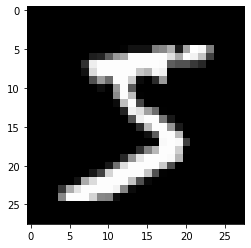

In [4]:
plt.imshow(X_train[0], cmap='gray')

# Normalizing

In [5]:
X_train = keras.utils.normalize(X_train, axis=1)
X_test = keras.utils.normalize(X_test, axis=1)

# One hot encoding

In [6]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Building model

In [7]:
model = Sequential()

model.add(Flatten(input_shape=INPUT_SHAPE))
model.add(Dense(1000, activation='relu'))

model.add(Dense(OUTPUT_COLS, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1000)              785000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


# Compile & training

In [9]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=True, name="SGD"), loss='categorical_crossentropy', metrics=['accuracy'])
model_training = model.fit(X_train, y_train, validation_split=0.3, epochs=30, callbacks=[EarlyStopping(patience=3)], verbose=1)

Epoch 1/30
1313/1313 [==============================] - 15s 11ms/step - loss: 1.6813 - accuracy: 0.6414 - val_loss: 0.6500 - val_accuracy: 0.8584
Epoch 2/30
1313/1313 [==============================] - 13s 10ms/step - loss: 0.5980 - accuracy: 0.8589 - val_loss: 0.4511 - val_accuracy: 0.8848
Epoch 3/30
1313/1313 [==============================] - 14s 11ms/step - loss: 0.4399 - accuracy: 0.8833 - val_loss: 0.3859 - val_accuracy: 0.8968
Epoch 4/30
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3848 - accuracy: 0.8944 - val_loss: 0.3539 - val_accuracy: 0.9031
Epoch 5/30
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3505 - accuracy: 0.9038 - val_loss: 0.3331 - val_accuracy: 0.9068
Epoch 6/30
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3246 - accuracy: 0.9099 - val_loss: 0.3173 - val_accuracy: 0.9113
Epoch 7/30
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3086 - accuracy: 0.9128 - val_loss: 0.3039 -

In [12]:
model.save('model.h5')
# model = keras.models.load_modal('model.h5')

# Plotting statistics

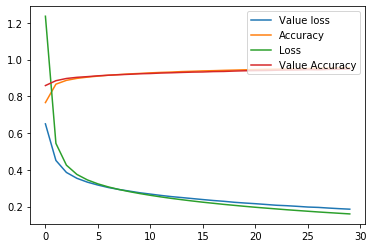

In [10]:
plt.plot(model_training.history['val_loss'], label='Value loss')
plt.plot(model_training.history['accuracy'], label='Accuracy')
plt.plot(model_training.history['loss'], label='Loss')
plt.plot(model_training.history['val_accuracy'], label='Value Accuracy')

plt.legend(loc='upper right')

# Predicting

In [10]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.1750 - accuracy: 0.9493
0.1749941110610962 0.9492999911308289
